In [0]:
!pip install --upgrade -q gspread

from google.colab import auth
auth.authenticate_user()

In [0]:
#IMPORT AUTH
from oauth2client.client import GoogleCredentials

import gspread
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [0]:
worksheet = gc.open('Lab2_Votes').sheet1
rows = worksheet.get_all_values()
dataArr = pd.DataFrame.from_records(rows)


In [0]:

voteArr = dataArr[0][0].split(',')

#print(removedData[[0]])

removedData = dataArr.drop(dataArr.index[[0,1]])
nameArr = np.array(removedData[[0]])
partyArr = np.array(removedData[[1]], dtype=float)
genderArr = np.array(removedData[[2]], dtype=float)
districtArr = np.array(removedData[[3]], dtype=float)

nVoters = 349
nVotes = 31

votes = np.zeros((nVoters, nVotes))
N = np.shape(votes)[0]
M = np.shape(votes)[1]

# 349
for i in range(N):
  # 31
  for j in range (M):
    votes[i,j] = voteArr[i * M + j]

 


In [0]:
#print(weight1)
from copy import deepcopy

epoch = 2000

eta = 0.2
nEta = 0.1
rangeDist = .6

start_eta = deepcopy(eta)
start_nEta = deepcopy(nEta)
start_rangeDist = deepcopy(rangeDist)

final_eta = 0.03
final_nEta = 0.01
final_rangeDist = 0.05

nNodes = 100
weight1 = np.random.rand(nNodes,31)

# Training looppp

for i in range(epoch): # epoch
  
  
  #print("Epoch " + str(i))
  for j in range(N): # N
    
    #pick out the corresponding row from the props matrix.
    voterVal = votes[j]
    # find the row of the weight matrix with the shortest distance to this attribute vector
    d = np.linalg.norm(voterVal- weight1,axis = 1)
    # Update winner
    shortestValue = np.min(d)
    shortestIndex = np.argmin(d)
    weight1[shortestIndex,:] += eta * (voterVal - weight1[shortestIndex,:]) 
    # Update neighbours
    dist = np.where(d < shortestValue + rangeDist , 1,0)
    dist[shortestIndex] = 0
    #print(str(np.count_nonzero(dist)) + " neighbours updated")
    weight1 += np.transpose(np.transpose(nEta * (voterVal - weight1)) * dist) 
    
  alphaA = float(i)/float(epoch)
  #learning rates and neighbour update
  eta = start_eta*np.power(final_eta/start_eta,alphaA)
  nEta = start_nEta*np.power(final_nEta/start_nEta,alphaA)

  rangeDist = start_rangeDist*np.power(final_rangeDist/start_rangeDist,alphaA)
    



(349, 1)
75.0
cluster name      party  gender district


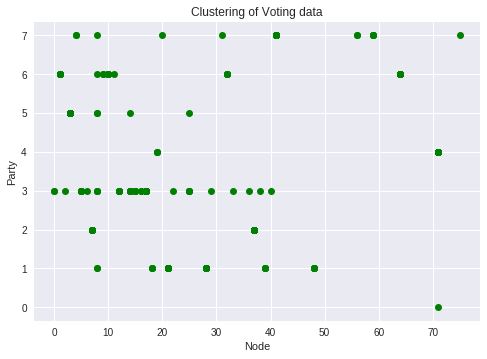

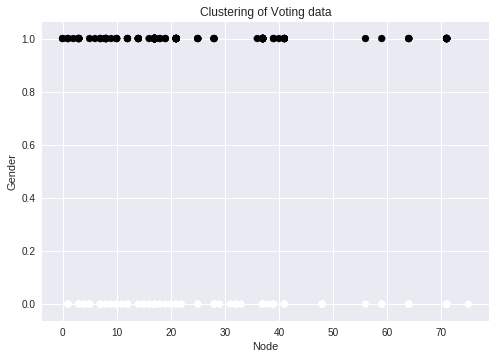

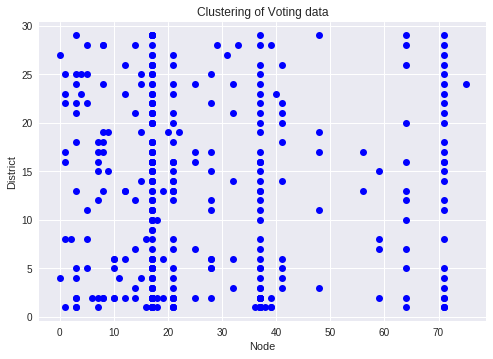

In [75]:
# Final loop and sorting
pos = np.zeros([N,1])

print(np.shape(pos))

for j in range(N):
  voterVal = votes[j]
  d = np.linalg.norm(voterVal- weight1,axis = 1) 
  shortestValue = np.min(d)
  shortestIndex = np.argmin(d)
  # Storing the shortest index
  pos[j] = shortestIndex

  
stacked = np.stack((pos, nameArr,partyArr, genderArr, districtArr), axis=1)  

stacked = stacked.tolist()

#nameArr = np.array(removedData[[0]])
#partyArr = np.array(removedData[[1]], dtype=float)
#genderArr = np.array(removedData[[2]], dtype=float)
#districtArr = np.array(removedData[[3]], dtype=float)

stacked = sorted(stacked, key=lambda stacked_entry: stacked_entry[0])

#print(np.shape(stacked))

print("cluster" + " " + "name    " + "  " + "party" + "  " + "gender" + " " + "district")
for i in range(N): # N
  cluster = str(stacked[i][0])[1:-1]
  name = str(stacked[i][1])[1:11][1:-1]
  party = str(stacked[i][2])[1:-1]
  gender = str(stacked[i][3])[1:-1]
  district = str(stacked[i][4])[1:-1]

  #print(cluster + "     " + name + "  " + party + "    " + gender + "    " + district)
  
x_val = [x[0] for x in stacked]
y_val_1 = [x[2] for x in stacked]
y_val_2 = [x[3] for x in stacked]
y_val_3 =[x[4] for x in stacked]

#COlormap
from matplotlib.colors import LinearSegmentedColormap
cMap = []
for value, colour in zip([0,1,2,3,4,5,6,7],["White", "Blue", "Blue", "Yellow", "Yellow", "Green", "Blue", "Green"]):
    cMap.append((value/7, colour))

customColourMap = LinearSegmentedColormap.from_list("custom", cMap)

plt.figure(1)
plt.plot(x_val,y_val_1,'go')
#plt.scatter(x_val, y_val, c=y_val, cmap=customColourMap,vmin=0, vmax=7)
#plt.colorbar()
plt.xlabel('Node')
plt.ylabel('Party')
plt.title('Clustering of Voting data')
plt.show()
#plt.show()



data = np.concatenate((x_val,y_val_2),1)
plt.figure(1)
#plt.plot(x_val,y_val_2,'ro')
plt.xlabel('Node')
plt.ylabel('Gender')
plt.title('Clustering of Voting data')
#plt.boxplot(data)
plt.scatter(data[:,0],data[:,1],c=data[:,1])
plt.show()

plt.figure(1)
plt.plot(x_val,y_val_3,'bo')
plt.xlabel('Node')
plt.ylabel('District')
plt.title('Clustering of Voting data')
plt.show()

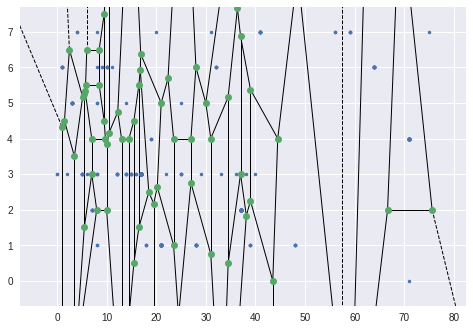

In [96]:
x_val = [x[0] for x in stacked]
y_val_1 = [x[2] for x in stacked]
y_val_2 = [x[3] for x in stacked]
y_val_3 =[x[4] for x in stacked]

#print(x_val)

voav = np.append(x_val,y_val_1, axis=1)

points = voav# np.array([[0, 0], [0, 1.5],[0, 1.5],[0, 1.5],[0, 1.5], [0, 2], [1, 0], [1, 1], [1, 3],[2, 0], [2, 9], [10, 10], [11, 10], [10, 11]])
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(points)

import matplotlib.pyplot as plt
voronoi_plot_2d(vor)
plt.show()


In [77]:
for j in range(N):
  voterVal = votes[j]
  d = np.linalg.norm(voterVal- weight1,axis = 1) 
  shortestValue = np.min(d)
  shortestIndex = np.argmin(d)
  # Storing the shortest index
  pos[j] = shortestIndex
  
  
print(pos)

[[21.]
 [37.]
 [39.]
 [21.]
 [17.]
 [39.]
 [71.]
 [36.]
 [ 3.]
 [37.]
 [ 1.]
 [17.]
 [16.]
 [21.]
 [71.]
 [64.]
 [71.]
 [37.]
 [17.]
 [ 7.]
 [17.]
 [21.]
 [38.]
 [18.]
 [17.]
 [37.]
 [17.]
 [37.]
 [ 3.]
 [25.]
 [37.]
 [14.]
 [71.]
 [17.]
 [10.]
 [21.]
 [10.]
 [21.]
 [ 8.]
 [ 7.]
 [17.]
 [17.]
 [17.]
 [17.]
 [ 6.]
 [17.]
 [28.]
 [64.]
 [21.]
 [17.]
 [12.]
 [39.]
 [37.]
 [ 3.]
 [19.]
 [17.]
 [21.]
 [37.]
 [37.]
 [71.]
 [59.]
 [37.]
 [ 8.]
 [18.]
 [ 3.]
 [37.]
 [37.]
 [17.]
 [48.]
 [71.]
 [41.]
 [17.]
 [21.]
 [17.]
 [17.]
 [32.]
 [14.]
 [17.]
 [37.]
 [37.]
 [21.]
 [15.]
 [17.]
 [17.]
 [ 0.]
 [11.]
 [17.]
 [ 3.]
 [71.]
 [37.]
 [41.]
 [28.]
 [17.]
 [71.]
 [17.]
 [17.]
 [ 3.]
 [10.]
 [41.]
 [28.]
 [17.]
 [64.]
 [21.]
 [37.]
 [17.]
 [17.]
 [ 5.]
 [37.]
 [28.]
 [32.]
 [10.]
 [17.]
 [17.]
 [19.]
 [17.]
 [41.]
 [12.]
 [10.]
 [17.]
 [28.]
 [37.]
 [21.]
 [59.]
 [25.]
 [17.]
 [14.]
 [64.]
 [37.]
 [59.]
 [ 1.]
 [ 5.]
 [21.]
 [71.]
 [16.]
 [ 2.]
 [17.]
 [37.]
 [17.]
 [17.]
 [17.]
 [17.]
 [18.]
 [64.]